In [2]:
%matplotlib widget

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.colors import LogNorm
import os, glob

import seaborn as sns
mako = sns.color_palette("mako", as_cmap=True)

plt.rcParams['figure.dpi'] = 300
plt.ioff()

In [4]:
data = {} # data[L, p] contains (fail_rate, density)
for f in glob.glob('data/run_12/run_12_*.npy'):
    n = int(f.split("_")[3].split(".")[0])
    L = int(100 * (n // 11 + 1)) # L = 100, 200, 300, 400, 500
    p_error = ((n % 11) + 35) / 10000 # p_error = 0.0035, 0.0036, ..., 0.0045
    data[L, p_error] = np.load(f)

In [5]:
data_array = np.empty((5, 11, 2))
for i, L in enumerate([100, 200, 300, 400, 500]):
    for j, p in enumerate(np.linspace(35, 45, 11)/10000):
        try:
            data_array[i, j] = data[L, p]
        except KeyError:
            data_array[i, j, 0] = np.NaN
            data_array[i, j, 1] = np.NaN

In [6]:
fail_rate = data_array[:, :, 0]
samples = data_array[:, :, 1]
error = np.sqrt(fail_rate * (1 - fail_rate) / samples)

In [7]:
L_ticks = np.linspace(100, 500, 5).astype(int)
p_ticks = np.linspace(35, 45, 11) / 10000

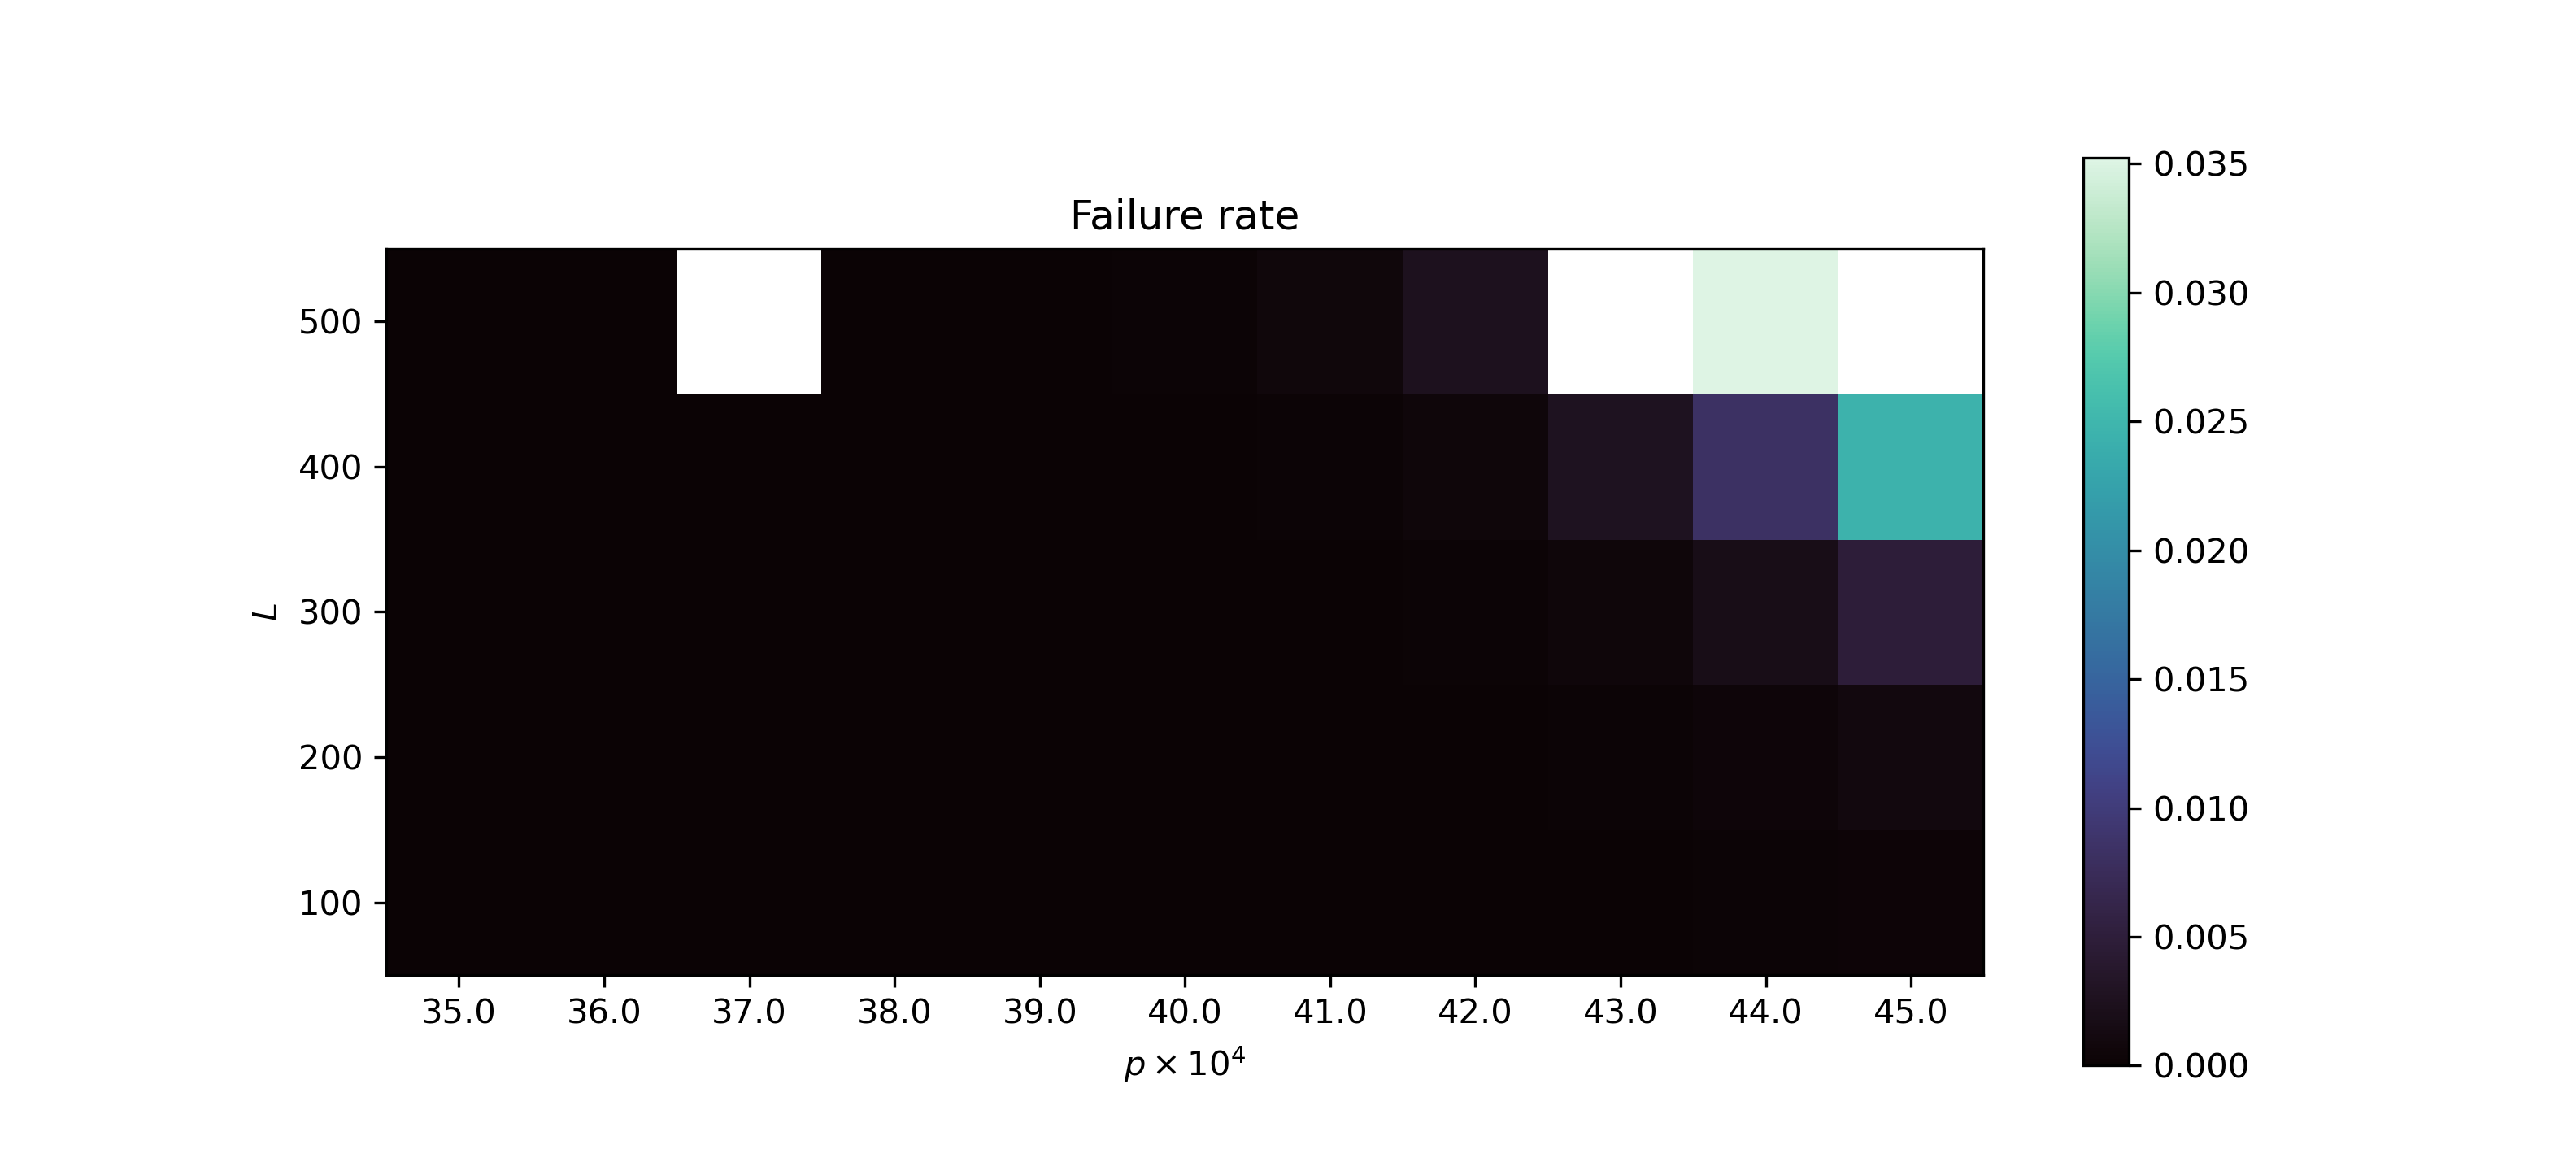

In [7]:
plt.matshow(fail_rate, cmap = mako, origin = 'lower')
plt.colorbar()
plt.title("Failure rate")
plt.ylabel("$L$")
plt.xlabel(r"$p\times10^4$")
plt.yticks(range(L_ticks.shape[0]), L_ticks)
plt.xticks(range(p_ticks.shape[0]), p_ticks*10000)
ax = plt.gca()
ax.xaxis.tick_bottom()
plt.savefig("plots/run12_fail_heatmap.png")
plt.show()

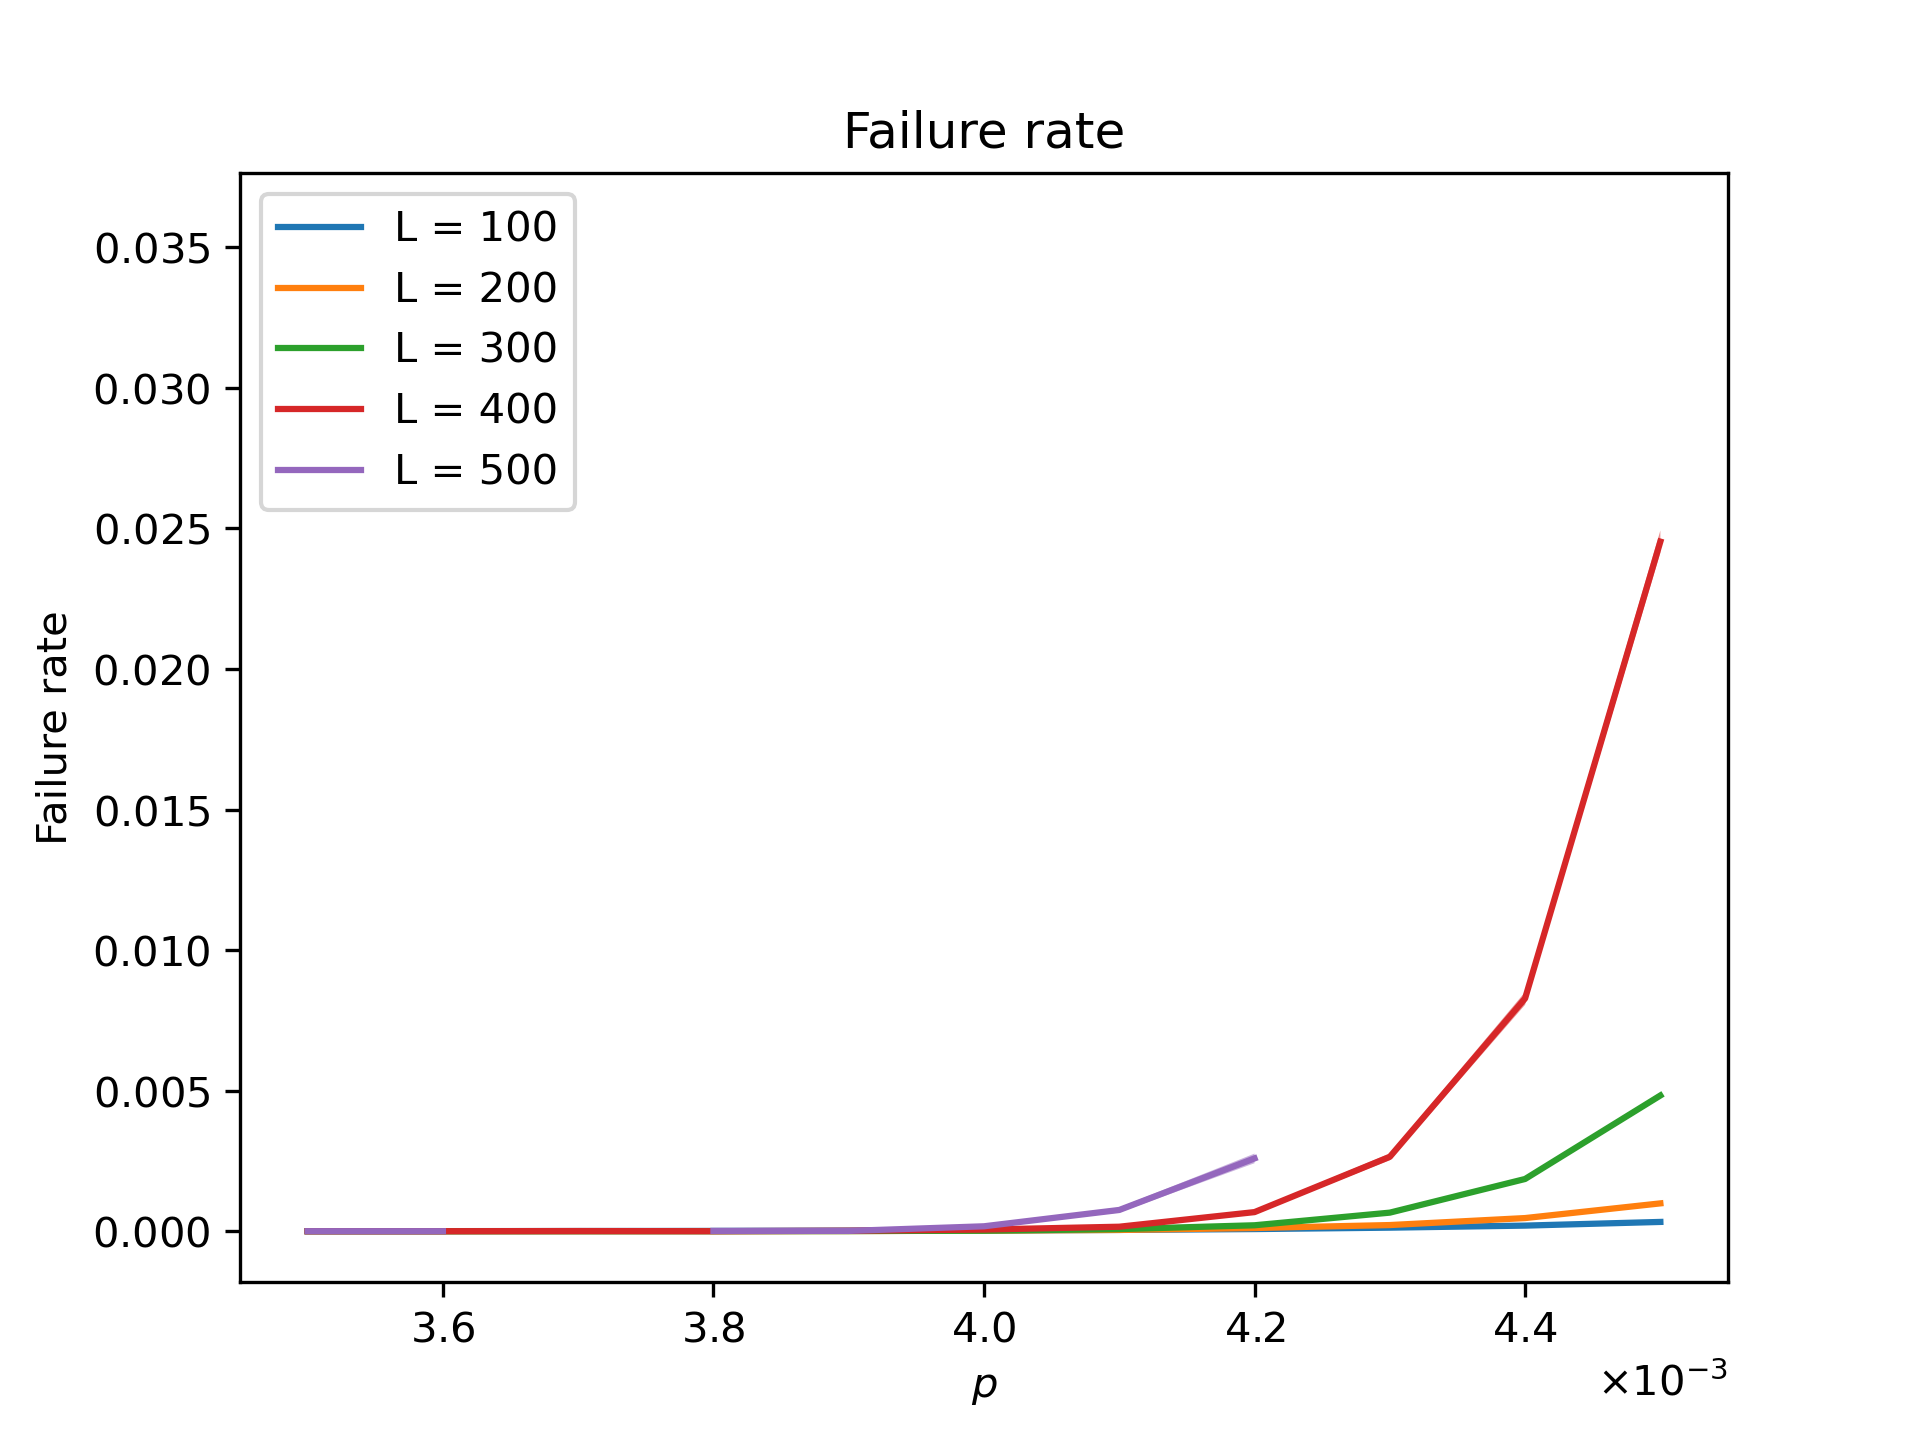

In [8]:
plt.clf()
for i, L in enumerate(L_ticks):
    plt.plot(p_ticks, fail_rate[i], label = f"L = {L}")
    plt.fill_between(p_ticks, fail_rate[i]-error[i], fail_rate[i]+error[i], alpha = 0.5)
plt.legend()
plt.title("Failure rate")
plt.xlabel("$p$")
plt.ylabel("Failure rate")
# plt.xticks()
plt.ticklabel_format(scilimits = (-3, 3), useMathText = True)
plt.savefig("plots/run12_fail_linear.png")
plt.show()

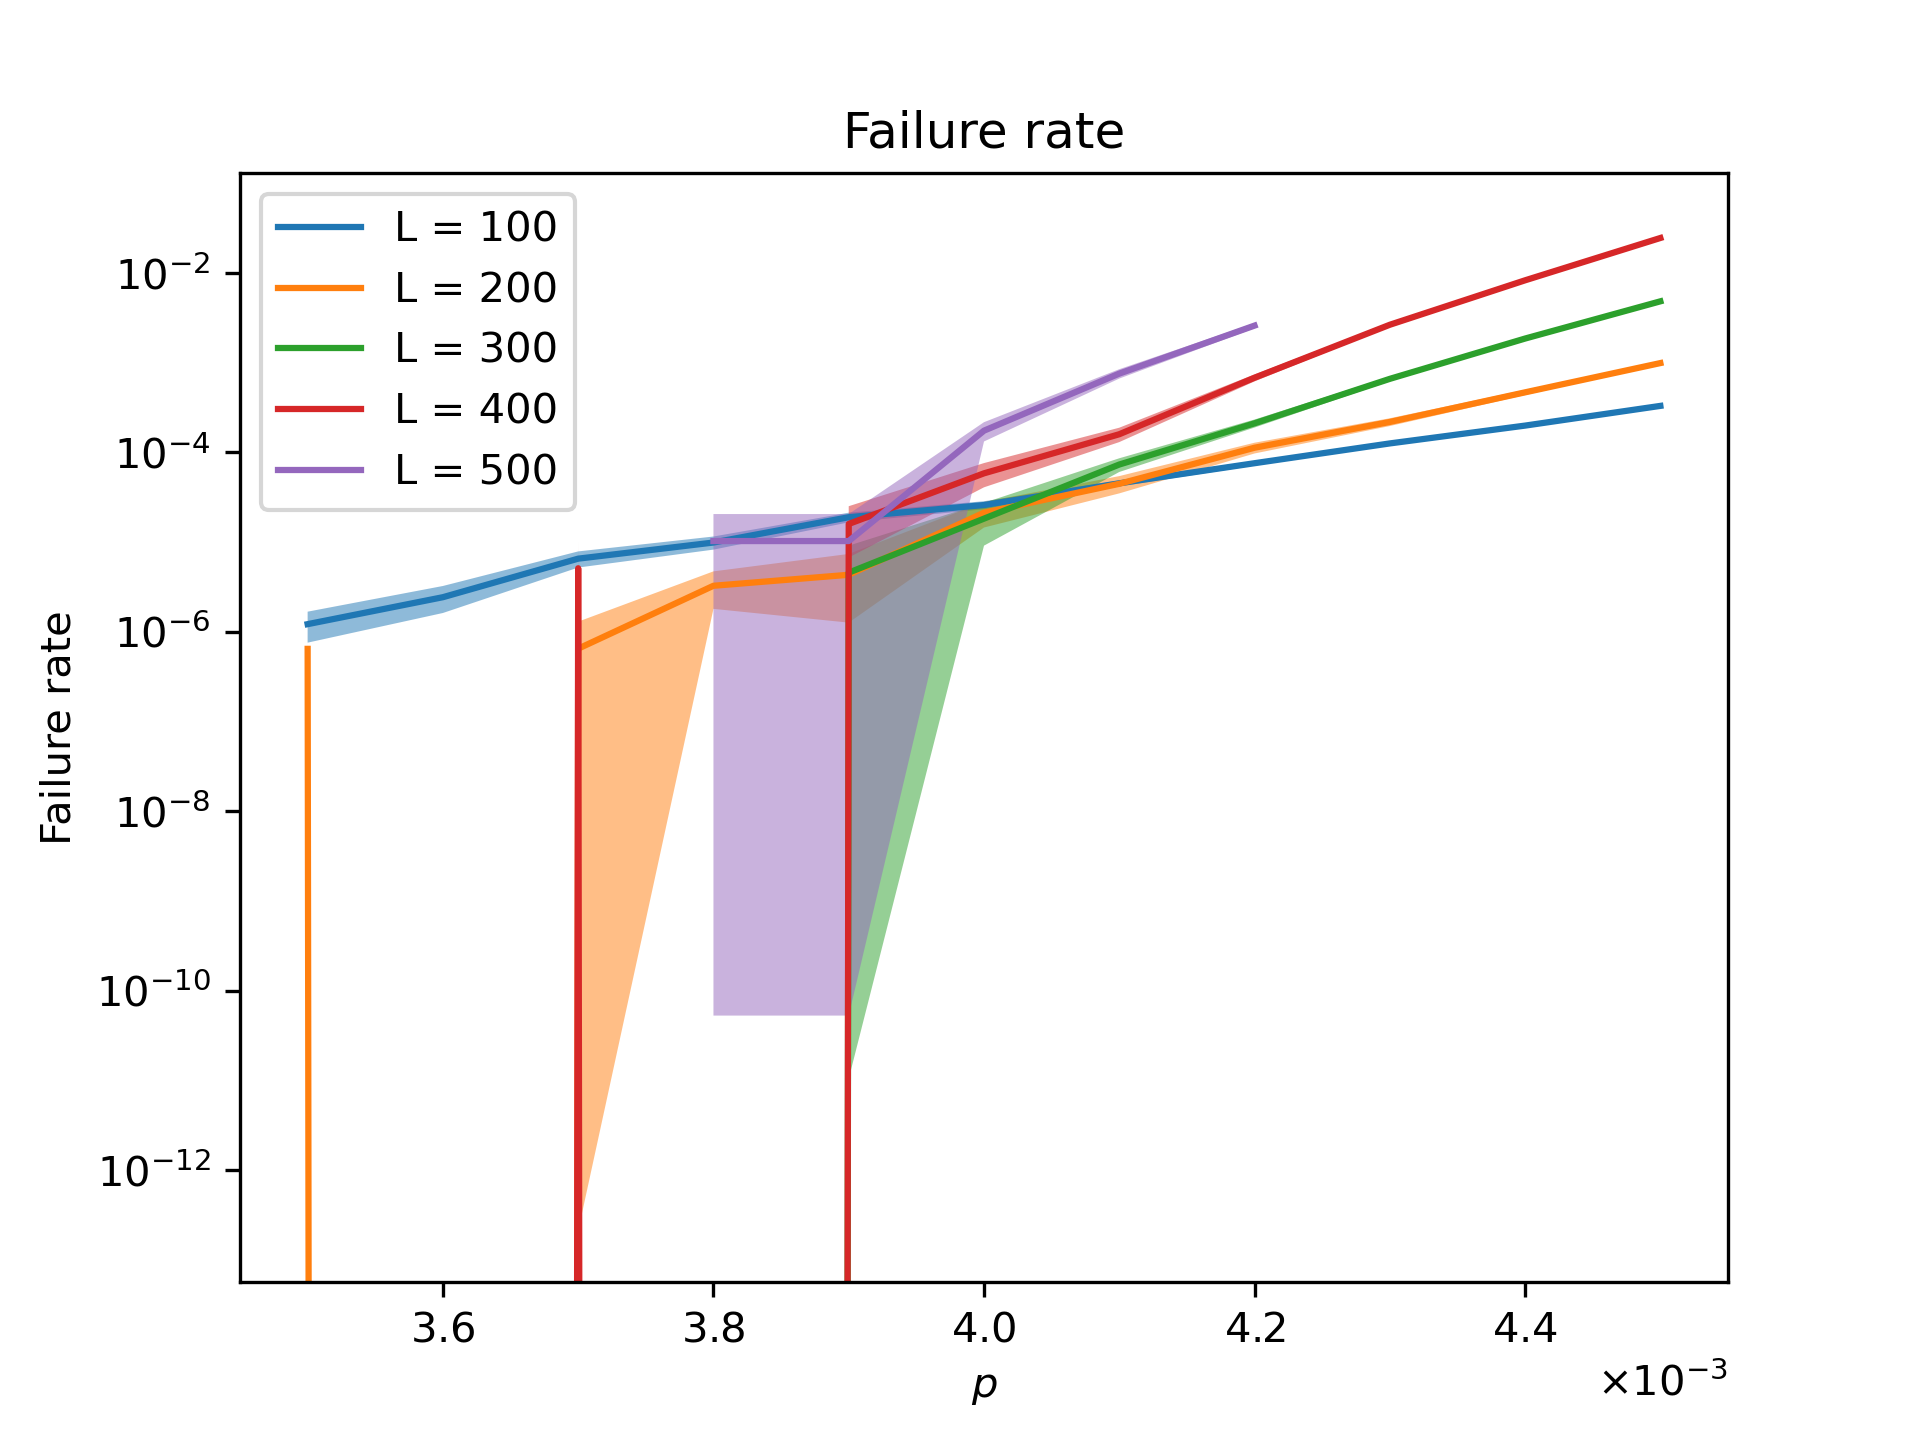

In [9]:
plt.clf()
for i, L in enumerate(L_ticks):
    plt.plot(p_ticks, fail_rate[i], label = f"L = {L}")
    plt.fill_between(p_ticks, fail_rate[i]-error[i], fail_rate[i]+error[i], alpha = 0.5)
plt.legend()
plt.title("Failure rate")
plt.xlabel("$p$")
plt.ylabel("Failure rate")
plt.ticklabel_format(scilimits = (-3, 3), useMathText = True)
plt.yscale("log")
plt.savefig("plots/run12_fail_log.png")
plt.show()

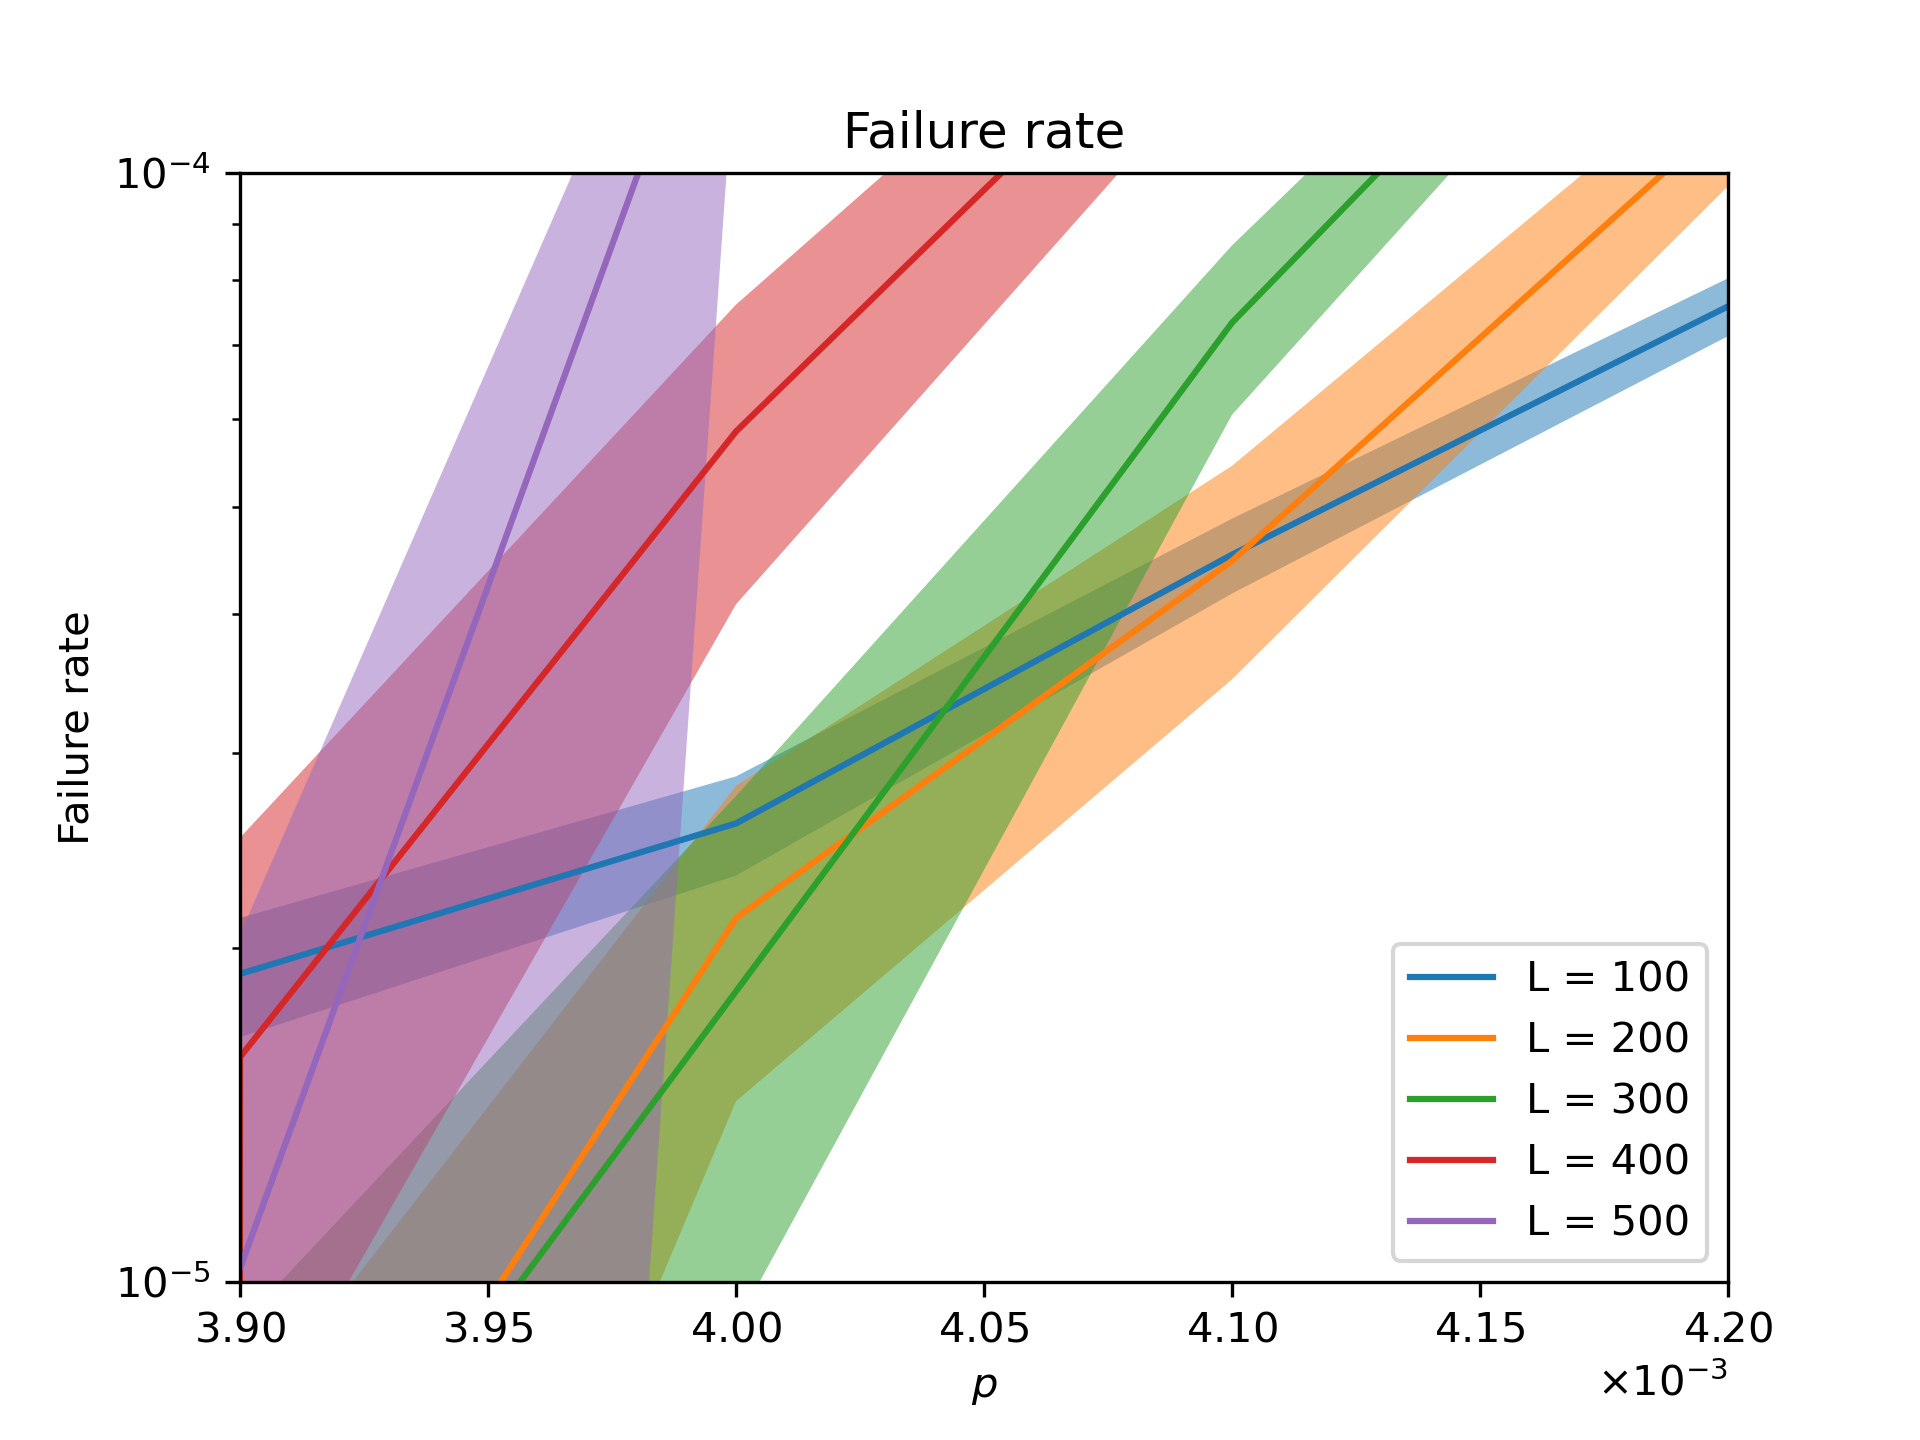

In [11]:
plt.clf()
for i, L in enumerate(L_ticks):
    plt.plot(p_ticks, fail_rate[i], label = f"L = {L}")
    plt.fill_between(p_ticks, fail_rate[i]-error[i], fail_rate[i]+error[i], alpha = 0.5)
plt.legend()
plt.title("Failure rate")
plt.xlabel("$p$")
plt.xlim(0.0039,0.0042)
plt.ylim(1e-5, 1e-4)
plt.ylabel("Failure rate")
plt.ticklabel_format(scilimits = (-3, 3), useMathText = True)
plt.yscale("log")
plt.savefig("plots/run12_fail_zoomed.png")
plt.show()